In [2]:
# This is a jupyter note book to perform EDA on the provided mental health dataset.


,timestamp,location_id,temperature_celsius,humidity_percent,air_quality_index,noise_level_db,lighting_lux,crowd_density,stress_level,sleep_hours,mood_score,mental_health_status
0,2024-05-01 08:00:00,104,24.328184,62.987529,67,54.429034,323.015836,45,23,7.22,2.3,0
1,2024-05-01 08:15:00,105,26.177300,52.482089,77,62.336451,412.211259,17,54,5.02,1.7,1
2,2024-05-01 08:30:00,103,25.443028,55.736424,120,51.967691,386.972786,35,39,4.96,2.9,0
3,2024-05-01 08:45:00,105,24.671652,71.484457,131,54.658851,339.056874,25,39,8.24,0.0,0
4,2024-05-01 09:00:00,105,21.628577,61.132704,81,60.623440,341.460697,36,18,6.61,3.0,0


In [1]:
# Load and read dataset with pandas
import pandas as pd

df = pd.read_csv("university_mental_health_iot_dataset.csv")
df.head()

,timestamp,location_id,temperature_celsius,humidity_percent,air_quality_index,noise_level_db,lighting_lux,crowd_density,stress_level,sleep_hours,mood_score,mental_health_status
0,2024-05-01 08:00:00,104,24.328184,62.987529,67,54.429034,323.015836,45,23,7.22,2.3,0
1,2024-05-01 08:15:00,105,26.177300,52.482089,77,62.336451,412.211259,17,54,5.02,1.7,1
2,2024-05-01 08:30:00,103,25.443028,55.736424,120,51.967691,386.972786,35,39,4.96,2.9,0
3,2024-05-01 08:45:00,105,24.671652,71.484457,131,54.658851,339.056874,25,39,8.24,0.0,0
4,2024-05-01 09:00:00,105,21.628577,61.132704,81,60.623440,341.460697,36,18,6.61,3.0,0


In [7]:
# Exploring the Data set
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   timestamp             1000 non-null   object 
 1   location_id           1000 non-null   int64  
 2   temperature_celsius   1000 non-null   float64
 3   humidity_percent      1000 non-null   float64
 4   air_quality_index     1000 non-null   int64  
 5   noise_level_db        1000 non-null   float64
 6   lighting_lux          1000 non-null   float64
 7   crowd_density         1000 non-null   int64  
 8   stress_level          1000 non-null   int64  
 9   sleep_hours           1000 non-null   float64
 10  mood_score            1000 non-null   float64
 11  mental_health_status  1000 non-null   int64  
dtypes: float64(6), int64(5), object(1)
memory usage: 93.9+ KB


timestamp               0
location_id             0
temperature_celsius     0
humidity_percent        0
air_quality_index       0
noise_level_db          0
lighting_lux            0
crowd_density           0
stress_level            0
sleep_hours             0
mood_score              0
mental_health_status    0
dtype: int64

In [8]:
# Exploring the Data set part 2
df.describe()

,location_id,temperature_celsius,humidity_percent,air_quality_index,noise_level_db,lighting_lux,crowd_density,stress_level,sleep_hours,mood_score,mental_health_status
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,103.004000,24.208457,60.189320,85.446000,54.722387,301.500435,31.736000,39.086000,6.423930,1.641000,0.501000
std,1.433192,3.012801,9.747296,37.970526,10.051077,48.873955,15.757366,13.416057,1.170662,1.016076,0.512115
min,101.000000,15.235949,29.804878,20.000000,24.540712,155.222115,5.000000,1.000000,3.000000,-2.200000,0.000000
25%,102.000000,22.183079,53.726462,51.000000,47.853538,267.386280,18.000000,29.000000,5.650000,1.000000,0.000000
50%,103.000000,24.168562,60.048989,86.000000,54.777010,300.471291,31.000000,39.000000,6.440000,1.700000,0.000000
75%,104.000000,26.125555,66.726456,119.000000,61.794293,334.167401,46.000000,49.000000,7.225000,2.500000,1.000000
max,105.000000,33.579323,91.377485,149.000000,85.926413,502.627506,59.000000,78.000000,9.950000,3.000000,2.000000


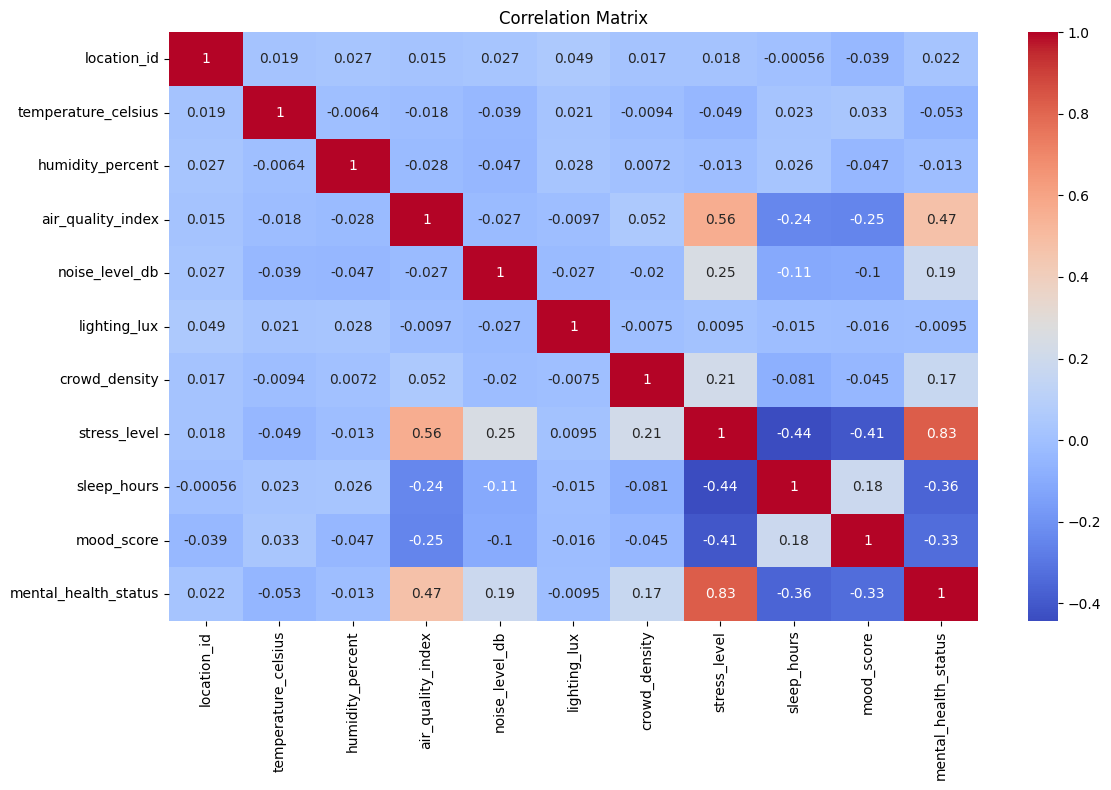

In [6]:
# Finding top features with a correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr(numeric_only=True)

# Can visualize this correlation matrix using matplotlib and seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix,annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

# Features with the strongest corrrelation with stress_level include mental_health_status, air_quality_index, and sleep_hours.
# Mental health status and air quality index are positively correlated, and sleep_hours are negatively correlated.

In [11]:
# Find correlations with stress
correlations_with_stress = df.corr(numeric_only=True)["stress_level"]

# Find top 3 correlations, removing stress_score's correlation with itself
top_features = correlations_with_stress.drop("stress_level").abs().sort_values(ascending=False).head(3)

top_features


mental_health_status    0.825346
air_quality_index       0.561575
sleep_hours             0.443454
Name: stress_level, dtype: float64